In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import math
from sklearn.model_selection import train_test_split,KFold
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [34]:
data = pd.read_csv('carvan_train.csv')

In [35]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


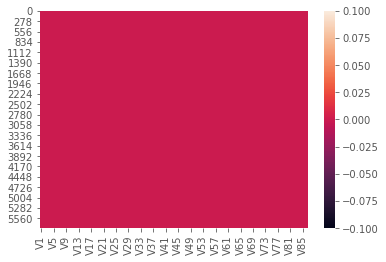

In [36]:
sns.heatmap(data.isnull())

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [44]:
train, test = train_test_split(data, test_size=0.33, random_state=42)

In [45]:
x_train = train.drop(['V86'],1)
y_train = train['V86']

x_test = test.drop(['V86'],1)
y_test= test['V86']

In [40]:
#x_train['random'] = np.random.random(size=len(x_train))

In [46]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [47]:
xgb2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
              learning_rate=0.01, max_delta_step=5, max_depth=10,
              min_child_weight=10, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.01, reg_lambda=0, scale_pos_weight=5, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [48]:
xgb2.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=5, max_depth=10,
              min_child_weight=10, missing=None, monotone_constraints='()',
              n_estimators=150, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.01,
              reg_lambda=0, scale_pos_weight=5, seed=0, silent=None,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=1)

In [13]:
from rfpimp import *

In [14]:
imp = importances(xgb2, x_train, y_train, n_samples=-1)

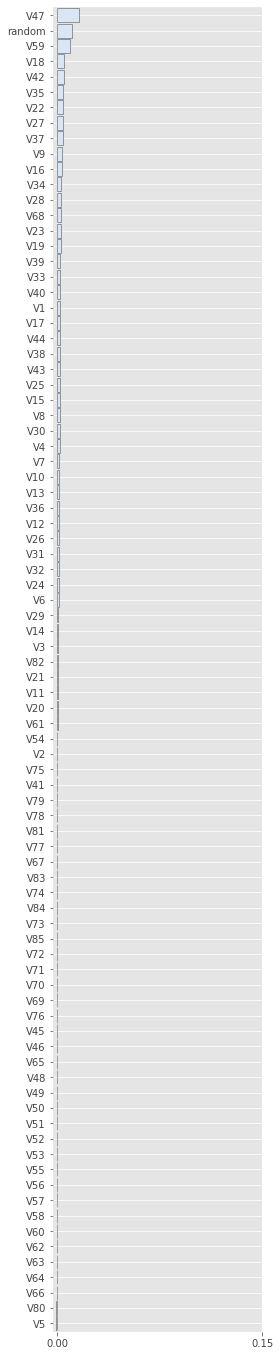

In [15]:
viz = plot_importances(imp)
viz.view()

In [16]:
imp

,Importance
Feature,
V47,0.016154
random,0.011026
V59,0.009744
V18,0.005128
V42,0.005128
...,...
V63,0.000000
V64,0.000000
V66,0.000000


In [49]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

2020-08-06 18:00:54,313 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[85/85] features ████████████████████ Time elapsed: 45 seconds

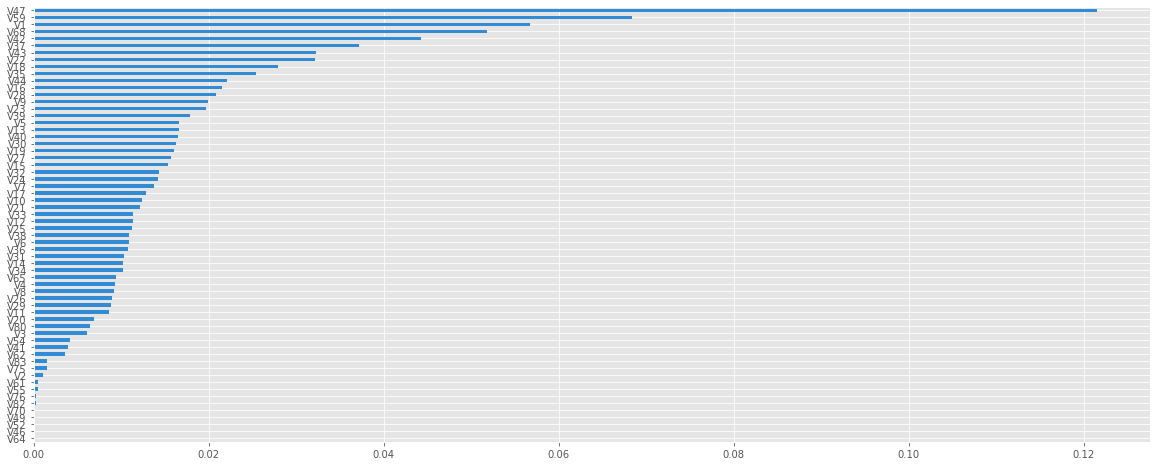

In [51]:
interpreter = Interpretation(x_train, feature_names=x_train.columns)
model = InMemoryModel(xgb2.predict_proba, examples=x_train)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending=True)

In [52]:
xgb2.classes_

array([0, 1], dtype=int64)

2020-08-06 18:43:22,599 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progressbar=False


[5/5] grid cells ████████████████████ Time elapsed: 5 seconds

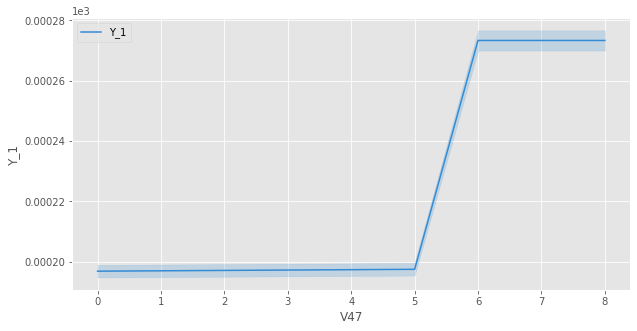

In [54]:
pyint_model = InMemoryModel(xgb2.predict_proba, examples=x_train, target_names=['Y_0','Y_1'])
axes_list = interpreter.partial_dependence.plot_partial_dependence(['V47'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))